In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


# Exploratory data analysis

In [4]:
# import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
# read data
data=pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv",header=None)


In [6]:
# to read test data
test_data=pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv",header=None)

In [7]:
# to show all rows
pd.set_option("display.max_rows",None)

In [8]:
# to show all columns
pd.set_option("display.max_columns", None)

In [9]:
# show first 5 rows
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432

In [12]:
# show last 5 row from the data
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,0.305263,0.294737,0.294737,0.284211,0.270175,0.287719,0.259649,0.259649,0.266667,0.263158,0.249123,0.273684,0.263158,0.263158,0.245614,0.270175,0.256140,0.256140,0.252632,0.252632,0.238596,0.245614,0.231579,0.235088,0.235088,0.238596,0.235088,0.235088,0.214035,0.238596,0.217544,0.217544,0.221053,0.224561,0.214035,0.217544,0.210526,0.228070,0.207018,0.207018,0.210526,0.210526,0.203509,0.214035,0.200000,0.214035,0.207018,0.214035,0.207018,0.221053,0.210526,0.235088,0.249123,0.431579,1.000000,0.505263,0.529825,0.550877,0.568421,0.554386,0.536842,0.442105,0.315789,0.185965,0.000000,0.066667,0.112281,0.129825,0.164912,0.217544,0.154386,0.126316,0.115789,0.119298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,0.651667,0.665000,0.681667,0.700000,0.711667,0.735000,0.763333,0.785000,0.810000,0.835000,0.856667,0.876667,0.880000,0.881667,0.865000,0.836667,0.808333,0.758333,0.708333,0.668333,0.623333,0.586667,0.545000,0.520000,0.518333,0.510000,0.498333,0.503333,0.500000,0.501667,0.501667,0.501667,0.498333,0.505000,0.505000,0.498333,0.498333,0.500000,0.483333,0.483333,0.485000,0.480000,0.478333,0.486667,0.485000,0.486667,0.481667,0.480000,0.480000,0.480000,0.473333,0.478333,0.483333,0.478333,0.466667,0.466667,0.465000,0.466667,0.468333,0.471667,0.475000,0.476667,0.471667,0.473333,0.475000,0.481667,0.471667,0.481667,0.491667,0.503333,0.556667,0.916667,1.000000,0.840000,0.760000,0.665000,0.560000,0.465000,0.356667,0.233333,0.140000,0.078333,0.048333,0.036667,0.050000,0.081667,0.155000,0.246667,0.280000,0.330000,0.380000,0.440000,0.483333,0.521667,0.548333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,0.048980,0.036735,0.053061,0.053061,0.097959,0.183673,0.269388,0.351020,0.408163,0.436735,0.469388,0.481633,0.518367,0.530612,0.534694,0.555102,0.591837,0.628571,0.632653,0.624490,0.616327,0.616327,0.608163,0.608163,0.620408,0.628571,0.624490,0.632653,0.644898,0.644898,0.644898,0.653061,0.661224,0.669388,0.677551,0.685714,0.689796,0.681633,0.693878,0.689796,0.693878,0.685714,0.681633,0.669388,0.648980,0.628571,0.620408,0.604082,0.591837,0.583673,0.567347,0.551020,0.542857,0.530612,0.526531,0

In [13]:
data.shape # (numbere of rows, number of columns)

(87554, 188)

In [15]:
# to show information for data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [16]:
# to see if data contains on any null values
data.isnull().sum().sum() 

0

 data not contain null values

In [17]:
# to delete any row duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(87554, 188)

In [19]:
data.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)

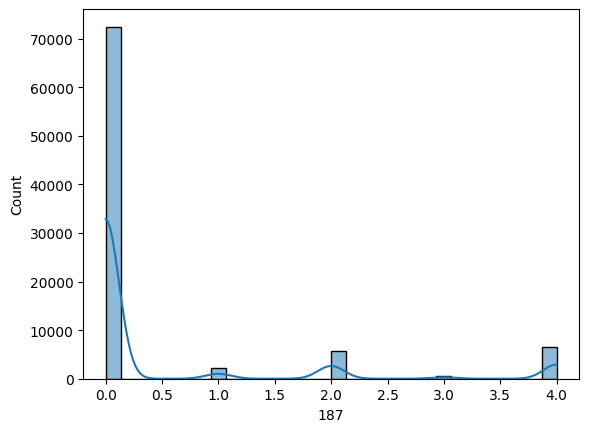

In [20]:
import seaborn as sns

# Plot histogram for a specific numerical column
sns.histplot(data[187], bins=30, kde=True)
plt.show()


from the graph most valuesfrom 0 to 0.2

In [21]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432

In [22]:
data.shape

(87554, 188)

In [23]:
# to change data type for this column
data[187]=data[187].astype(int)

In [24]:
# to show data type for this column
data[187].dtypes

dtype('int64')

In [25]:
# to show count classes in this column 
data[187].value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [24]:
# data[187]=[0 if num==0 else 1 for num in data[187]]

In [26]:
data[187].value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

# building model 

In [27]:
y=data[187].values

In [28]:
x=data.drop([187],axis=1)

In [29]:
print(x.shape)
print(y.shape)

(87554, 187)
(87554,)


In [30]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance, you can adjust this
x_pca = pca.fit_transform(x_train)

In [32]:
principle_Df = pd.DataFrame(data =x_pca)

In [33]:
print(principle_Df.head())

         0         1         2         3         4         5         6   \
0 -0.411998  1.013092  0.542772 -0.303516  0.488946 -0.230355  0.213281   
1  0.549478 -0.568262  0.476278  0.086703 -0.086164  0.023532 -0.045624   
2  2.174962  0.411011  0.095806 -0.606015 -0.125150 -0.421156  0.445409   
3 -0.163693 -0.757880 -0.074486  0.322170 -0.503306 -0.262662 -0.378964   
4 -1.380454  0.032463  0.607190  0.711983 -0.260102  0.334642  0.863700   

         7         8         9         10        11        12        13  \
0  0.327899 -0.009730 -0.013015  0.223923 -0.154546  0.388374  0.087505   
1 -0.271091 -0.149337 -0.089257  0.043474  0.021692 -0.289616 -0.033905   
2  0.581553 -0.081835 -0.163272 -0.031162 -0.142323  0.321818  0.235282   
3  0.323391  0.409786 -0.167585  0.052101  0.019998 -0.182498  0.321395   
4 -0.114235 -0.210125  0.127800 -0.425851 -0.254047  0.186276 -0.217596   

         14        15        16        17        18        19        20  \
0  0.084072 -0.020823  

In [34]:
print(principle_Df.shape)

(70043, 35)


In [35]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# Check the original class distribution
print('Original training class distribution:', Counter(y_train))

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and resample the training data
x_res, y_res = smote.fit_resample(x_pca, y_train)

# Check the resampled class distribution
print('Resampled training class distribution:', Counter(y_res))

Original training class distribution: Counter({0: 57892, 4: 5182, 2: 4676, 1: 1797, 3: 496})
Resampled training class distribution: Counter({2: 57892, 0: 57892, 4: 57892, 1: 57892, 3: 57892})


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'class_weight': [{0: 1, 1: 5, 2: 1, 3: 5, 4: 1}]  # Adjust as needed
 }

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_res, y_res)

best_rf_model = grid_search.best_estimator_


In [39]:
 best_rf_model

RandomForestClassifier(class_weight={0: 1, 1: 5, 2: 1, 3: 5, 4: 1},
                       max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=200)

In [41]:
# Apply the same PCA transformation on the test data
x_test_pca = pca.transform(x_test)

In [42]:
y_pred=best_rf_model.predict(x_test_pca)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14579
           1       0.72      0.81      0.76       426
           2       0.93      0.90      0.91      1112
           3       0.48      0.84      0.61       145
           4       0.99      0.97      0.98      1249

    accuracy                           0.97     17511
   macro avg       0.82      0.90      0.85     17511
weighted avg       0.97      0.97      0.97     17511



[[14263   132    64   112     8]
 [   77   344     4     1     0]
 [   86     3  1000    21     2]
 [   14     2     7   122     0]
 [   32     0     5     0  1212]]


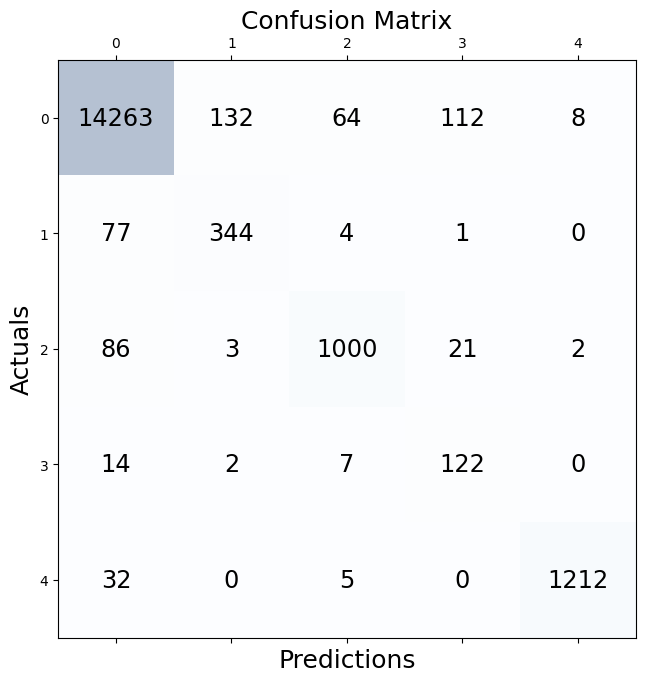

In [44]:
print(confusion_matrix(y_test,y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [45]:
from sklearn import metrics
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred,average="macro")
precision = metrics.precision_score(y_test, y_pred,average='macro')
recall = metrics.recall_score(y_test, y_pred,average='macro')

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 96.7 %
model f1_score - : 84.8 %
model precision - : 81.9 %
model recall - : 89.9  %


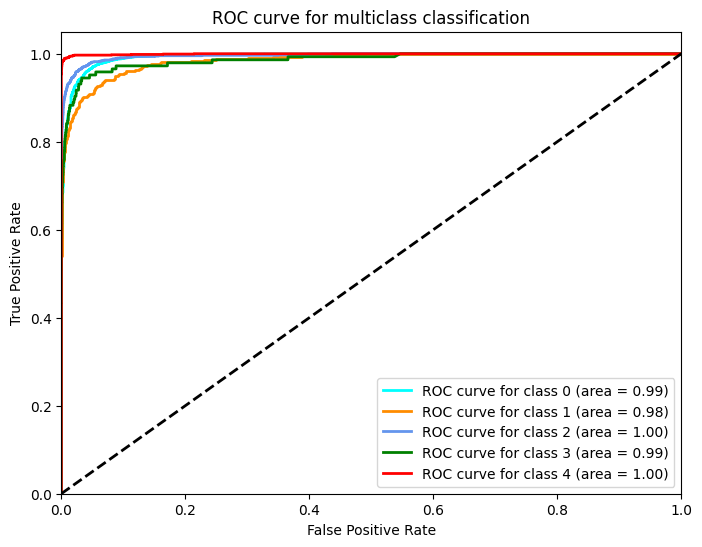

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and XGB_model are already defined

# Binarize the output for multiclass ROC curve
n_classes = len(np.unique(y_test))  # Number of classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Modify as per your classes

# Get the predicted probabilities for each class
y_score = best_rf_model.predict_proba(x_test_pca)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each ROC curve
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']  # Add more colors if needed

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass classification')
plt.legend(loc="lower right")
plt.show()


In [47]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for each class
y_pred_proba = best_rf_model.predict_proba(x_test_pca)  # This will be a 2D array of shape (n_samples, n_classes)

# Calculate the ROC AUC score for multiclass (One-vs-Rest)
ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9916


In [48]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702,0.041322,0.012397,0.086777,0.066116,0.066116,0.051653,0.039256,0.043388,0.033058,0.041322,0.035124,0.045455,0.041322,0.045455,0.043388,0.049587,0.047521,0.06405,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,0.092920,0.106195,0.106195,0.123894,0.097345,0.123894,0.119469,0.141593,0.132743,0.154867,0.146018,0.168142,0.159292,0.163717,0.168142,0.168142,0.163717,0.181416,0.185841,0.199115,0.176991,0.203540,0.190265,0.203540,0.194690,0.212389,0.203540,0.2123

In [49]:
test_data[187]=test_data[187].astype(int)

In [50]:
test_data[187].dtype

dtype('int64')

In [51]:
# test_data[187]=[0 if num==0 else 1 for num in test_data[187]]

In [52]:
test_data[187].value_counts()

187
0    18118
4     1608
2     1448
1      556
3      162
Name: count, dtype: int64

In [53]:
x_test1=test_data.drop([187],axis=1)

In [54]:
y_test1=test_data[[187]].values

In [55]:
# x_test1 = x_test1.drop(x_test1.columns[100:187], axis=1)

In [56]:
x_test1.shape

(21892, 187)

In [57]:
y_test1.shape

(21892, 1)

In [58]:
# Apply the same PCA transformation on the test data
x_test1_pca = pca.transform(x_test1)

In [59]:
x_test1_pca.shape

(21892, 35)

In [60]:
y_pred_test = best_rf_model.predict(x_test1_pca)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18118
           1       0.70      0.78      0.74       556
           2       0.93      0.91      0.92      1448
           3       0.43      0.78      0.56       162
           4       0.99      0.96      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.81      0.88      0.83     21892
weighted avg       0.97      0.97      0.97     21892



[[17743   175    70   123     7]
 [  114   432     8     1     1]
 [   89     1  1318    39     1]
 [   23     0    12   127     0]
 [   52     6     8     3  1539]]


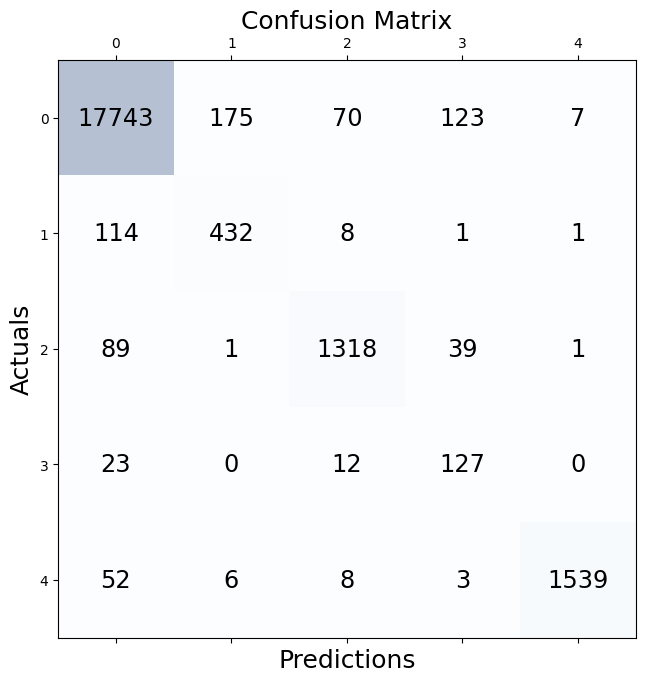

In [62]:
print(confusion_matrix(y_test1,y_pred_test))

conf_matrix = confusion_matrix(y_true=y_test1, y_pred=y_pred_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [63]:
accracy = metrics.accuracy_score(y_test1, y_pred_test)
f1_score = metrics.f1_score(y_test1, y_pred_test,average="macro")
precision = metrics.precision_score(y_test1, y_pred_test,average="macro")
recall = metrics.recall_score(y_test1, y_pred_test,average="macro")

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 96.7 %
model f1_score - : 83.5 %
model precision - : 80.9 %
model recall - : 88.2  %


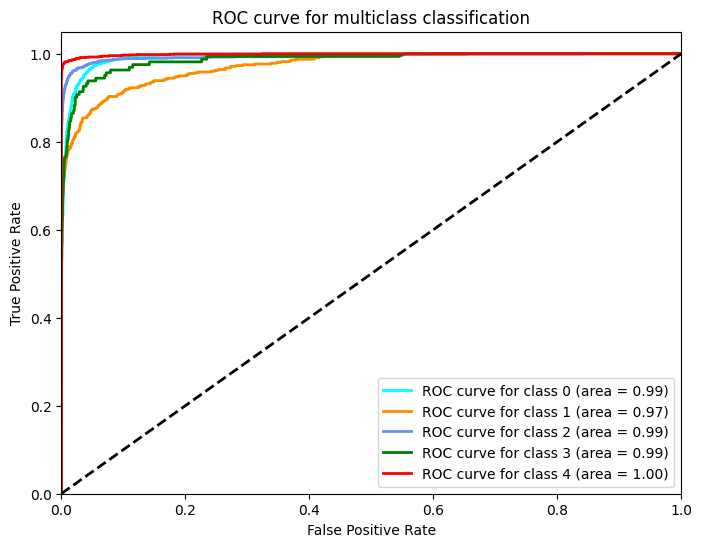

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and XGB_model are already defined

# Binarize the output for multiclass ROC curve
n_classes = len(np.unique(y_test1))  # Number of classes
y_test_binarized = label_binarize(y_test1, classes=[0, 1, 2, 3, 4])  # Modify as per your classes

# Get the predicted probabilities for each class
y_score = best_rf_model.predict_proba(x_test1_pca)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each ROC curve
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']  # Add more colors if needed

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass classification')
plt.legend(loc="lower right")
plt.show()


In [65]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for each class
y_pred_proba = best_rf_model.predict_proba(x_test1_pca)  # This will be a 2D array of shape (n_samples, n_classes)

# Calculate the ROC AUC score for multiclass (One-vs-Rest)
ROC_AUC = roc_auc_score(y_test1, y_pred_proba, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9885
